<h2>Load data</h2>

In [12]:
from numpy import loadtxt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.utils import shuffle

# Load data
df = pd.read_csv("../data/iris.csv")
np_data = df.values

# Split data into X and y
X_raw = np_data[:,0:-1].astype(float)
y_raw = np_data[:,-1]

# Convert text labels to integers
encoder = LabelEncoder()
encoder.fit(y_raw)
y = encoder.transform(y_raw)

# Normalize data to avoid high input values
scaler = StandardScaler()
scaler.fit(X_raw)
X = scaler.transform(X_raw)

# Shuffle data
X, y = shuffle(X, y, random_state=0)

print("Examples: {}".format(X.shape[0]))
print("Attributes: {}".format(X.shape[1]))
print("Possible categories: {} encoded to {}".format(np.unique(y_raw),np.unique(y)))

Examples: 150
Attributes: 4
Possible categories: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] encoded to [0 1 2]


<h2>Function for evaluating model accuracy</h2>

In [2]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

def evaluate(model):
    print("-- Training data --")
    # train model on training dataset
    model.fit(X, y)
    # evaluate dataset
    y_pred = model.predict(X)
    # calculate accuracy
    accuracy = accuracy_score(y, y_pred)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    # confusion matrix
    print("Confusion Matrix:")
    conf_mx = confusion_matrix(y, y_pred)
    print(conf_mx)
    print(classification_report(y, y_pred))
    
    print("")
    print("-- 5-fold CV --")
    # 5-fold CV
    y_pred = cross_val_predict(model, X, y, cv=5)
    # calculate accuracy
    accuracy = accuracy_score(y, y_pred)
    print("Average accuracy: %.2f%%" % (accuracy * 100.0))
    # confusion matrix
    print("Confusion Matrix:")
    conf_mx = confusion_matrix(y, y_pred)
    print(conf_mx)
    print(classification_report(y, y_pred))

<h2>Linear classifier</h2>

In [3]:
from sklearn import linear_model

model = linear_model.SGDClassifier(max_iter=1000, tol=1e-5, random_state=42)
evaluate(model)

-- Training data --
Accuracy: 97.33%
Confusion Matrix:
[[49  1  0]
 [ 0 48  2]
 [ 0  1 49]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.96      0.96      0.96        50
           2       0.96      0.98      0.97        50

   micro avg       0.97      0.97      0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150


-- 5-fold CV --
Average accuracy: 90.67%
Confusion Matrix:
[[50  0  0]
 [ 4 43  3]
 [ 0  7 43]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        50
           1       0.86      0.86      0.86        50
           2       0.93      0.86      0.90        50

   micro avg       0.91      0.91      0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150



<h2>Neural Network classifier</h2>

In [4]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(max_iter=2000, random_state=42)
evaluate(model)

-- Training data --
Accuracy: 98.00%
Confusion Matrix:
[[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

   micro avg       0.98      0.98      0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150


-- 5-fold CV --
Average accuracy: 96.00%
Confusion Matrix:
[[49  1  0]
 [ 0 47  3]
 [ 0  2 48]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.94      0.94      0.94        50
           2       0.94      0.96      0.95        50

   micro avg       0.96      0.96      0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



<h2>Decision Tree classifier</h2>

In [5]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(min_samples_leaf=10, max_depth=8, random_state=42)
evaluate(model)

-- Training data --
Accuracy: 96.00%
Confusion Matrix:
[[50  0  0]
 [ 0 49  1]
 [ 0  5 45]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.91      0.98      0.94        50
           2       0.98      0.90      0.94        50

   micro avg       0.96      0.96      0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150


-- 5-fold CV --
Average accuracy: 94.67%
Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  5 45]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.90      0.94      0.92        50
           2       0.94      0.90      0.92        50

   micro avg       0.95      0.95      0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



<h2>SVM classifier</h2>

In [6]:
from sklearn import svm

model = svm.SVC(random_state=42, gamma="scale")
evaluate(model)

-- Training data --
Accuracy: 97.33%
Confusion Matrix:
[[50  0  0]
 [ 0 48  2]
 [ 0  2 48]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.96      0.96        50
           2       0.96      0.96      0.96        50

   micro avg       0.97      0.97      0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150


-- 5-fold CV --
Average accuracy: 96.67%
Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.94      0.95        50
           2       0.94      0.96      0.95        50

   micro avg       0.97      0.97      0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



<h2>kNN classifier</h2>

In [7]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
evaluate(model)

-- Training data --
Accuracy: 95.33%
Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  4 46]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.94      0.93        50
           2       0.94      0.92      0.93        50

   micro avg       0.95      0.95      0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150


-- 5-fold CV --
Average accuracy: 94.67%
Confusion Matrix:
[[49  1  0]
 [ 0 47  3]
 [ 0  4 46]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.90      0.94      0.92        50
           2       0.94      0.92      0.93        50

   micro avg       0.95      0.95      0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



<h2>XGBoost classifier</h2>

In [8]:
from xgboost import XGBClassifier

# Ignore deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

model = XGBClassifier(random_state=42)
evaluate(model)

-- Training data --
Accuracy: 100.00%
Confusion Matrix:
[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

   micro avg       1.00      1.00      1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150


-- 5-fold CV --
Average accuracy: 96.67%
Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.94      0.95        50
           2       0.94      0.96      0.95        50

   micro avg       0.97      0.97      0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



## Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=5)
evaluate(model)

-- Training data --
Accuracy: 100.00%
Confusion Matrix:
[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

   micro avg       1.00      1.00      1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150


-- 5-fold CV --
Average accuracy: 94.00%
Confusion Matrix:
[[50  0  0]
 [ 0 46  4]
 [ 0  5 45]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.90      0.92      0.91        50
           2       0.92      0.90      0.91        50

   micro avg       0.94      0.94      0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150



<h2>Plot attributes</h2>

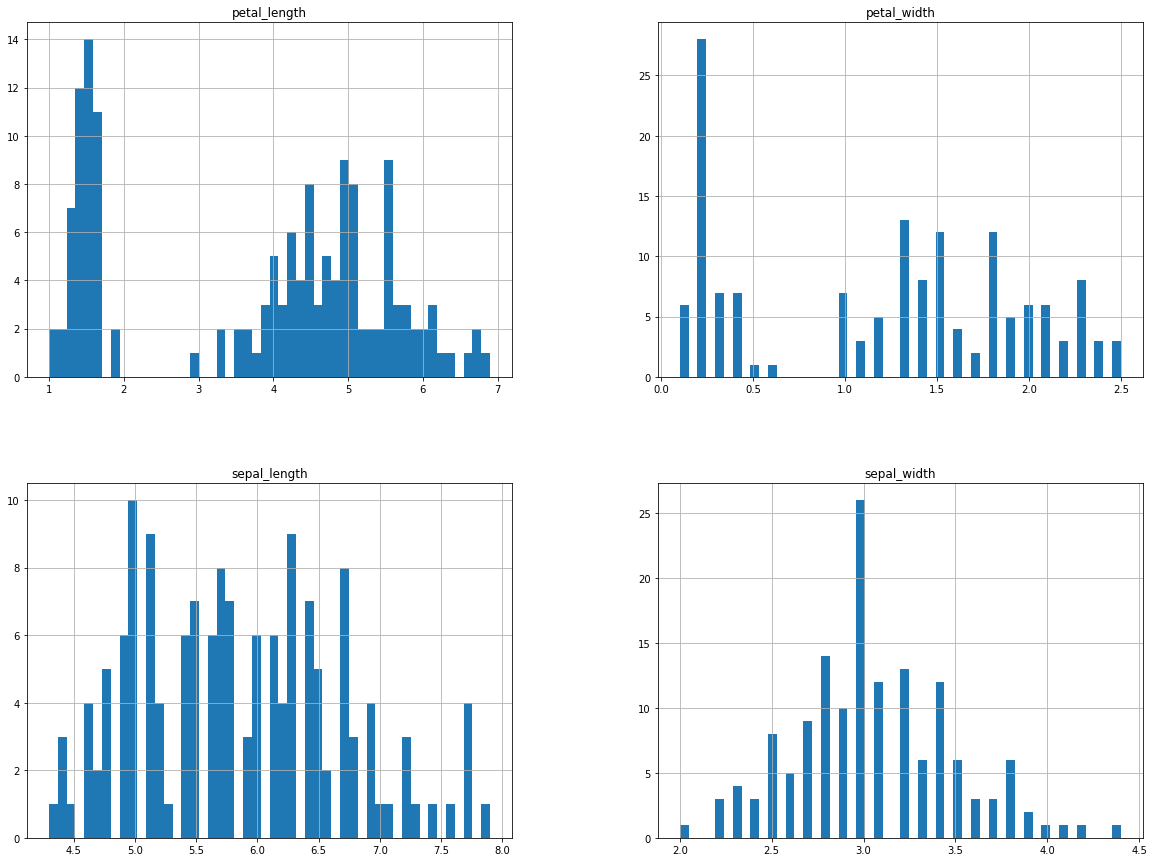

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()